## <i> Predicting Cryptocurrency Stock Prices Using Advanced Machine Learning Algorithms </i>
## <i>Import The Library Files</i>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("12 (2) (Data).csv")

## <i> Dataset Overview </i>

In [5]:
df

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.92000,0.92370,0.92000,0.92260,2.384512e+06,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.92520,0.93340,0.90520,0.92000,1.634385e+08,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.91140,0.93500,0.89810,0.92520,2.500749e+08,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.99410,0.99660,0.89640,0.91150,5.672341e+08,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.95380,1.01670,0.93720,0.99410,4.794362e+08,4.729372e+08
...,...,...,...,...,...,...,...,...,...
1329,1.525740e+12,5-8-2018,XRP-USDT,0.82490,0.84802,0.79200,0.80667,1.297130e+07,1.057184e+07
1330,1.525650e+12,5-7-2018,XRP-USDT,0.86482,0.86886,0.80000,0.82490,1.730349e+07,1.419228e+07
1331,1.525560e+12,5-6-2018,XRP-USDT,0.90280,0.91800,0.83774,0.86483,1.600204e+07,1.399714e+07
1332,1.525480e+12,5-5-2018,XRP-USDT,0.88980,0.93500,0.88800,0.90280,1.681617e+07,1.528200e+07


In [6]:
df.describe()

,unix,open,high,low,close,Volume XRP,Volume USDT
count,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1.334000e+03
mean,1.582978e+12,0.473318,0.495597,0.450075,0.473632,3.567016e+08,2.356279e+08
std,3.328447e+10,0.319903,0.341216,0.297513,0.320127,5.914574e+08,4.840987e+08
min,1.525390e+12,0.135360,0.149380,0.101290,0.135490,2.384512e+06,2.198450e+06
25%,1.554182e+12,0.256295,0.263605,0.250050,0.256343,6.448872e+07,1.894323e+07
50%,1.582975e+12,0.326050,0.337595,0.315500,0.326050,1.480822e+08,4.136179e+07
75%,1.611770e+12,0.565155,0.599938,0.528917,0.566190,3.779833e+08,2.519194e+08
max,1.640560e+12,1.833960,1.966890,1.652430,1.834680,8.608358e+09,4.589984e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


### <i> Data Preprocessing </i>

In [9]:
# 3. Convert Data Types
# Convert 'date' column to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# 4. Sort the Data
# Sort by date for time-series consistency (if applicable)
df = df.sort_values(by='date')

# 5. Feature Engineering
# Add meaningful features
df['price_change'] = df['close'] - df['open']
df['price_change_percentage'] = ((df['close'] - df['open']) / df['open']) * 100
df['volatility'] = df['high'] - df['low']  # High-Low range
df['average_price'] = (df['high'] + df['low']) / 2

# Drop columns that may cause target leakage
features_to_drop = ['close', 'price_change']  # 'close' is the target, 'price_change' depends on 'close'
df_features = df.drop(columns=features_to_drop, errors='ignore')


### <i> Expolatory Data Analysis ( EDA ) </i>

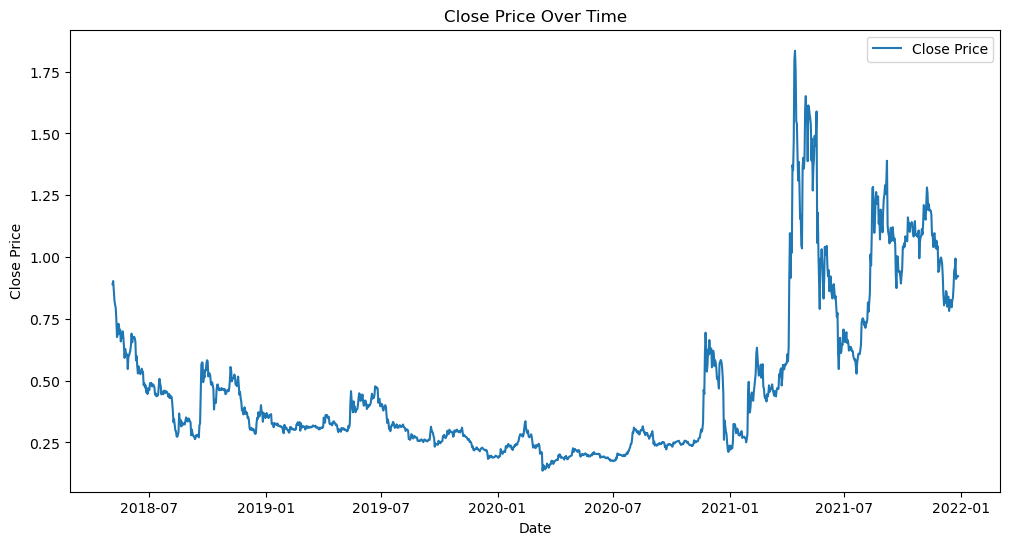

In [11]:
# Visualization Preparation
# 1. Line plot of 'close' prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

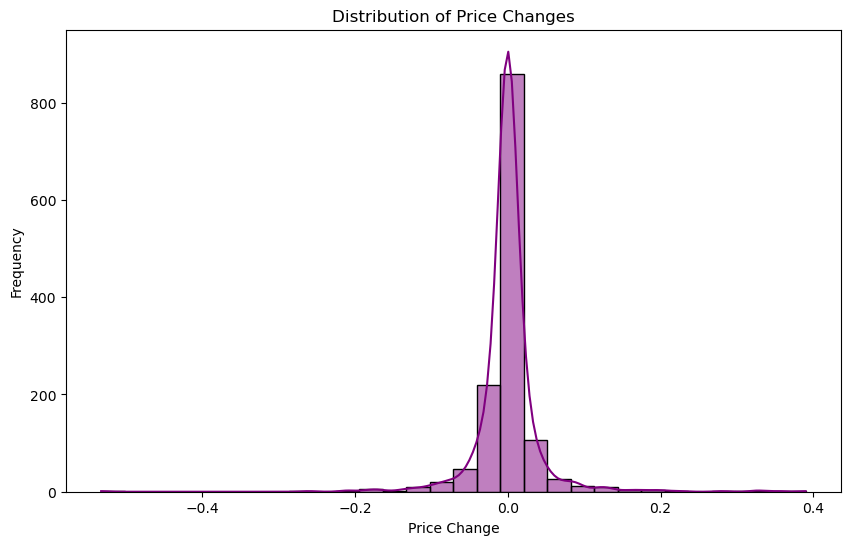

In [12]:
# 2. Distribution of price changes
plt.figure(figsize=(10, 6))
sns.histplot(df['price_change'], kde=True, bins=30, color='purple')
plt.title('Distribution of Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

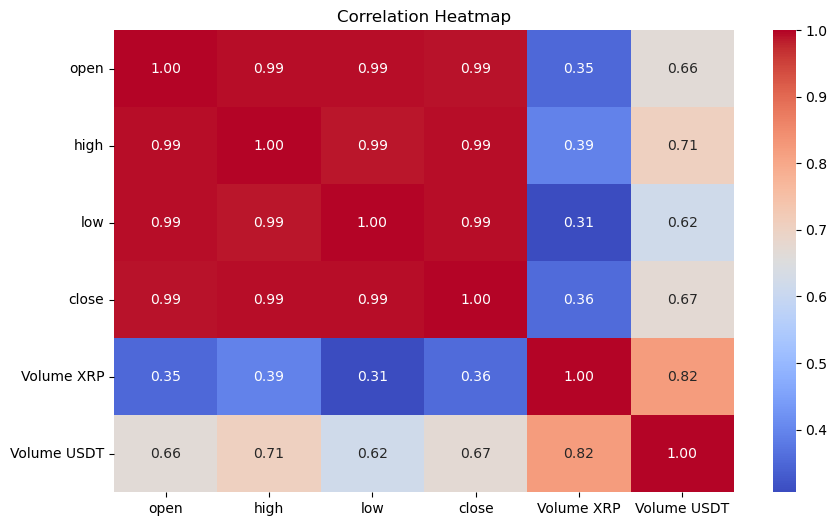

In [13]:
# 3. Correlation heatmap
correlation_matrix = df[['open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

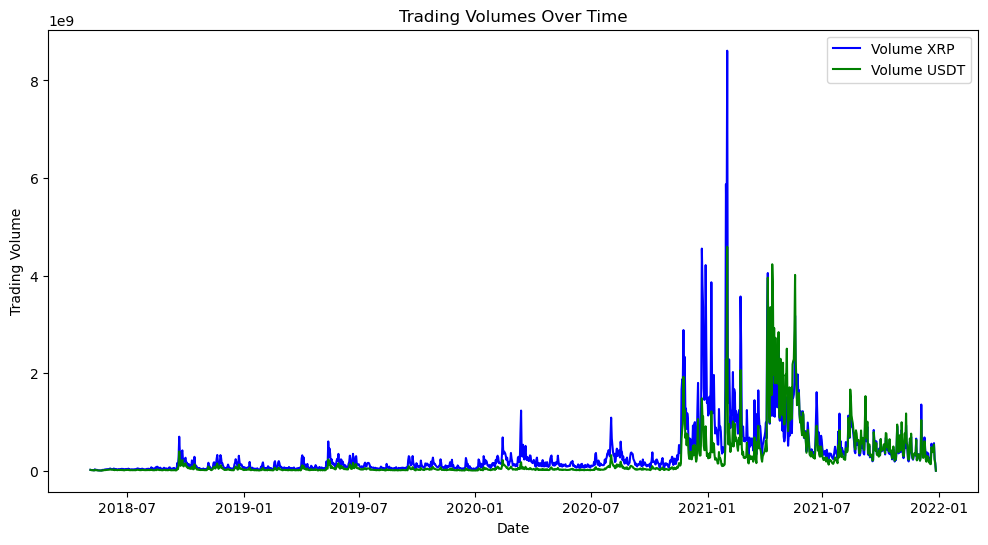

In [14]:
# 4. Daily trading volumes (XRP vs. USDT)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Volume XRP', data=df, label='Volume XRP', color='blue')
sns.lineplot(x='date', y='Volume USDT', data=df, label='Volume USDT', color='green')
plt.title('Trading Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

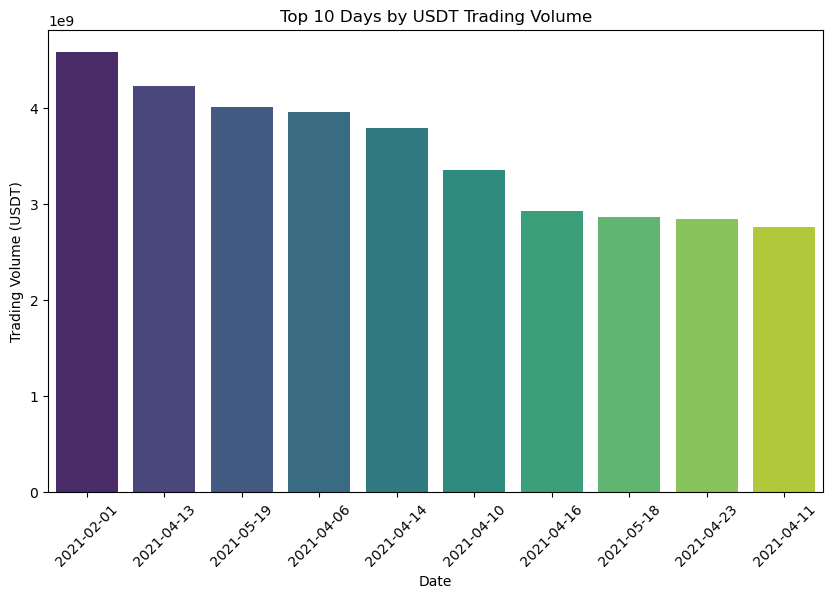

In [15]:
# 3. **Top N Days by Trading Volume**
top_n_volume = df.nlargest(10, 'Volume USDT')
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='Volume USDT', data=top_n_volume, palette='viridis')
plt.title('Top 10 Days by USDT Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume (USDT)')
plt.xticks(rotation=45)
plt.show()

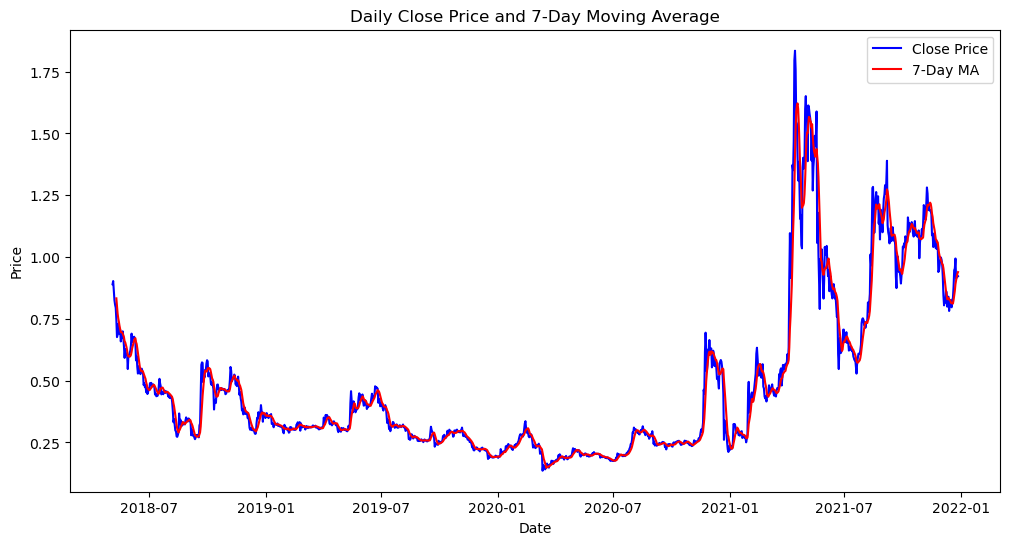

In [16]:
# 5. **Daily Close Price and Moving Average**
df['7_day_MA'] = df['close'].rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price', color='blue')
sns.lineplot(x='date', y='7_day_MA', data=df, label='7-Day MA', color='red')
plt.title('Daily Close Price and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### <i> Models </i>
### <i> Linear Regression </i>

In [19]:
features = ['open', 'high', 'low', 'Volume XRP', 'Volume USDT']
target = 'close'


X = df[features]
y = df[target]

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Metrics Calculation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R²): 1.00


### <i> Random Forest Regressor </i>

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics Calculation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Metrics
print("Random Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


Random Forest Metrics:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R²): 1.00


### <i> XGBRegressor </i>

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics Calculation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print Metrics
print("XGBoost Metrics:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")


XGBoost Metrics:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R²): 0.99


### <i> Comparison </i>

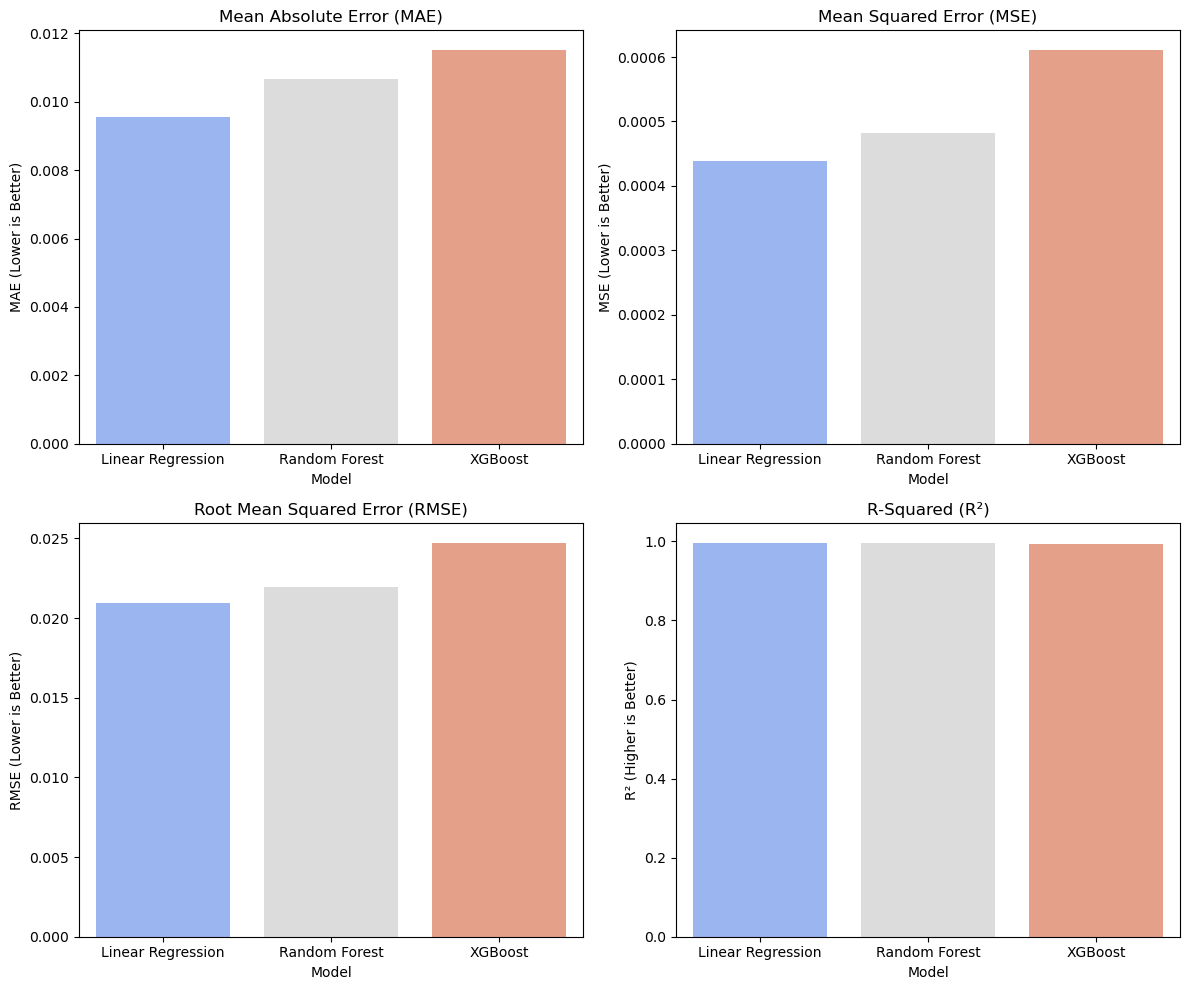

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collect metrics for visualization
metrics = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae, mae_rf, mae_xgb],
    "MSE": [mse, mse_rf, mse_xgb],
    "RMSE": [rmse, rmse_rf, rmse_xgb],
    "R²": [r2, r2_rf, r2_xgb]
}

metrics_df = pd.DataFrame(metrics)

# Plot bar charts for each metric
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x="Model", y="MAE", data=metrics_df, ax=ax[0, 0], palette="coolwarm")
ax[0, 0].set_title("Mean Absolute Error (MAE)")
ax[0, 0].set_ylabel("MAE (Lower is Better)")

sns.barplot(x="Model", y="MSE", data=metrics_df, ax=ax[0, 1], palette="coolwarm")
ax[0, 1].set_title("Mean Squared Error (MSE)")
ax[0, 1].set_ylabel("MSE (Lower is Better)")

sns.barplot(x="Model", y="RMSE", data=metrics_df, ax=ax[1, 0], palette="coolwarm")
ax[1, 0].set_title("Root Mean Squared Error (RMSE)")
ax[1, 0].set_ylabel("RMSE (Lower is Better)")

sns.barplot(x="Model", y="R²", data=metrics_df, ax=ax[1, 1], palette="coolwarm")
ax[1, 1].set_title("R-Squared (R²)")
ax[1, 1].set_ylabel("R² (Higher is Better)")

plt.tight_layout()
plt.show()
